## Setup

In [692]:
!pip install matplotlib seaborn

In [693]:
import pandas as pd
# import sklearn
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
# from sklearn.metrics import auc
import seaborn as sns

In [694]:
# this part is given
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information from over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 15 years ago. So if today is 2024.05.17 then the weather we want to forecast is for the date 2009.05.18. You are supposed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to use BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck in the first part, you can use the replacement data provided in the second part

This part below is given

In [695]:
%%bigquery 
SELECT
*,
FROM `bigquery-public-data.samples.gsod`
LIMIT 20 


/opt/homebrew/bin/venv38/lib/python3.8/site-packages/google/cloud/bigquery/job/query.py:2052: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
/opt/homebrew/bin/venv38/lib/python3.8/site-packages/google/cloud/bigquery/table.py:2379: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,39800,99999,1929,12,11,45.500000,4,43.500000,4,981.400024,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
1,37770,99999,1929,12,6,47.000000,4,41.299999,4,993.099976,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
2,31590,99999,1929,12,6,45.799999,4,38.299999,4,974.500000,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
3,30910,99999,1929,11,25,49.799999,4,NaN,<NA>,986.500000,...,NaN,<NA>,0.04,NaN,False,False,False,False,False,False
4,33790,99999,1929,8,29,62.000000,4,56.299999,4,1015.599976,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
5,38110,99999,1929,11,2,47.799999,4,44.000000,4,1027.900024,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
6,33790,99999,1929,9,17,55.700001,4,52.799999,4,1021.799988,...,NaN,<NA>,0.00,NaN,True,True,True,True,True,True
7,30750,99999,1929,12,7,43.299999,4,41.799999,4,966.599976,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
8,34970,99999,1929,8,26,62.599998,4,56.000000,4,1023.500000,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
9,37770,99999,1929,12,19,36.000000,4,28.799999,4,1033.099976,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False


## Part 1

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2005 till 2009 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

In [696]:
%%bigquery weather_data
WITH formatted_data AS (
    SELECT
    FORMAT("%i-%02d-%02d", year, month, day) AS date, * EXCEPT (year, month, day)
    FROM `bigquery-public-data.samples.gsod`
)
SELECT * FROM formatted_data
WHERE 
    date BETWEEN "2005-01-01" AND "2009-12-31" 
        AND station_number BETWEEN 725300 AND 726300


/opt/homebrew/bin/venv38/lib/python3.8/site-packages/google/cloud/bigquery/job/query.py:2052: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
/opt/homebrew/bin/venv38/lib/python3.8/site-packages/google/cloud/bigquery/table.py:2379: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


### 2. Task 
From here you want to work with the data from all stations 725300 to 725330 that have information from 2005 till 2009. 

--> Since in the last step we saved the dataset in a pandas dataframe, I assume that from here on I can continue using pandas.

In [697]:
# limit the station numbers as indicated. We already filtered the stations starting from station 725300 in the task above. So here we only 
# add an upper limit of station 725330
weather_data_subset = weather_data[(weather_data['station_number'] <= 725330)]

# get an overview of the dataset
weather_data_subset.head()

,date,station_number,wban_number,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
59,2005-11-09,725314,99999,67.599998,21,51.200001,21,1014.500000,21,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
61,2005-04-14,725314,99999,53.299999,21,36.400002,21,1021.799988,21,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
84,2005-01-19,725314,99999,36.400002,23,25.500000,23,1022.200012,19,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
106,2005-11-05,725305,99999,50.599998,23,44.099998,23,1009.599976,15,NaN,...,NaN,<NA>,0.03,NaN,False,False,False,False,False,False
112,2005-11-20,725326,99999,41.299999,24,33.299999,24,NaN,<NA>,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False


Additionally, we are instructed to only include stations that have information from 2005 till 2009. The data is already limited to 2005 to 2009, so here we focus on the question, if all stations have data. 

In [698]:
# get the size of the dataframe. If a variable has 'rows' number NaNs, it has no data and can be discarded
rows, col = weather_data_subset.shape
rows, col

(18129, 29)

In [699]:
# check and count any missing values values
weather_data_subset.isna().sum()

date                                      0
station_number                            0
wban_number                               0
mean_temp                                 0
num_mean_temp_samples                     0
mean_dew_point                            2
num_mean_dew_point_samples                2
mean_sealevel_pressure                 1838
num_mean_sealevel_pressure_samples     1838
mean_station_pressure                 17136
num_mean_station_pressure_samples     17136
mean_visibility                           3
num_mean_visibility_samples               3
mean_wind_speed                           5
num_mean_wind_speed_samples               5
max_sustained_wind_speed                 10
max_gust_wind_speed                    6661
max_temperature                           2
max_temperature_explicit                  2
min_temperature                       18129
min_temperature_explicit              18129
total_precipitation                     191
snow_depth                      

'min_temperature' and 'min_temperature_explicit' do not have any data, so we can discard them. Additionally, 'mean_station_pressure',  'num_mean_station_pressure_samples' and 'snow_depth' have data only in a small fraction of the data, so let's discard them too, because with this little data it will be hard to meaningfully replace missing values. 'snow_depth' might also be a data leakage for the target variable 'snow' and should be discarded anyways.

In [700]:
weather_data_subset.drop(['min_temperature','min_temperature_explicit','mean_station_pressure','num_mean_station_pressure_samples', \
                          'snow_depth'], axis=1, inplace=True)

/var/folders/kh/l5x0kpsx5cz08611zgnhwrxw0000gn/T/ipykernel_26160/1207390559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_subset.drop(['min_temperature','min_temperature_explicit','mean_station_pressure','num_mean_station_pressure_samples', \


Now we can go back to the task: "From here you want to work with the data from all stations 725300 to 725330 that have information 
from 2005 till 2009." Therefore, we now check if any station has no information at all for the timeframe from 2005 to 2009 we previously
selected.

In [701]:
weather_data_subset.isna().sum()

date                                     0
station_number                           0
wban_number                              0
mean_temp                                0
num_mean_temp_samples                    0
mean_dew_point                           2
num_mean_dew_point_samples               2
mean_sealevel_pressure                1838
num_mean_sealevel_pressure_samples    1838
mean_visibility                          3
num_mean_visibility_samples              3
mean_wind_speed                          5
num_mean_wind_speed_samples              5
max_sustained_wind_speed                10
max_gust_wind_speed                   6661
max_temperature                          2
max_temperature_explicit                 2
total_precipitation                    191
fog                                      0
rain                                     0
snow                                     0
hail                                     0
thunder                                  0
tornado    

In [702]:
# count number of rows per station and number of NaNs per station to find out if some stations have no data
rows_per_station = weather_data_subset.groupby('station_number').size()
nan_count_per_station = weather_data_subset.groupby('station_number').apply(lambda x: x.isna().sum())
nan_count_per_station

,date,station_number,wban_number,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_visibility,...,max_gust_wind_speed,max_temperature,max_temperature_explicit,total_precipitation,fog,rain,snow,hail,thunder,tornado
station_number,,,,,,,,,,,,,,,,,,,,,
725300,0,0,0,0,0,0,0,0,0,0,...,451,0,0,11,0,0,0,0,0,0
725305,0,0,0,0,0,1,1,4,4,0,...,721,0,0,18,0,0,0,0,0,0
725314,0,0,0,0,0,0,0,22,22,0,...,871,0,0,45,0,0,0,0,0,0
725315,0,0,0,0,0,0,0,1,1,0,...,708,0,0,8,0,0,0,0,0,0
725316,0,0,0,0,0,1,1,14,14,0,...,684,0,0,15,0,0,0,0,0,0
725317,0,0,0,0,0,0,0,2,2,0,...,654,0,0,29,0,0,0,0,0,0
725320,0,0,0,0,0,0,0,0,0,0,...,664,0,0,16,0,0,0,0,0,0
725326,0,0,0,0,0,0,0,1785,1785,3,...,512,0,0,0,0,0,0,0,0,0
725327,0,0,0,0,0,0,0,10,10,0,...,623,2,2,37,0,0,0,0,0,0


In [703]:
print(rows_per_station)

station_number
725300    1822
725305    1824
725314    1800
725315    1824
725316    1824
725317    1822
725320    1824
725326    1785
725327    1781
725330    1823
dtype: int64


The visual inspection showed that there are a few missing values. Notably, Station 725326 has no data in 'mean_sealevel_pressure' and 
'num_mean_sealevel_pressure_samples'. However, other stations have data, so I will not remove these columns for now. Also, station 725326
in the other columns, so I will not remove this station either.

Do a first analysis of the remaining dataset, clean or drop data depending on how you see appropriate. 

Text(0.5, 1.0, 'Variable Correlations')

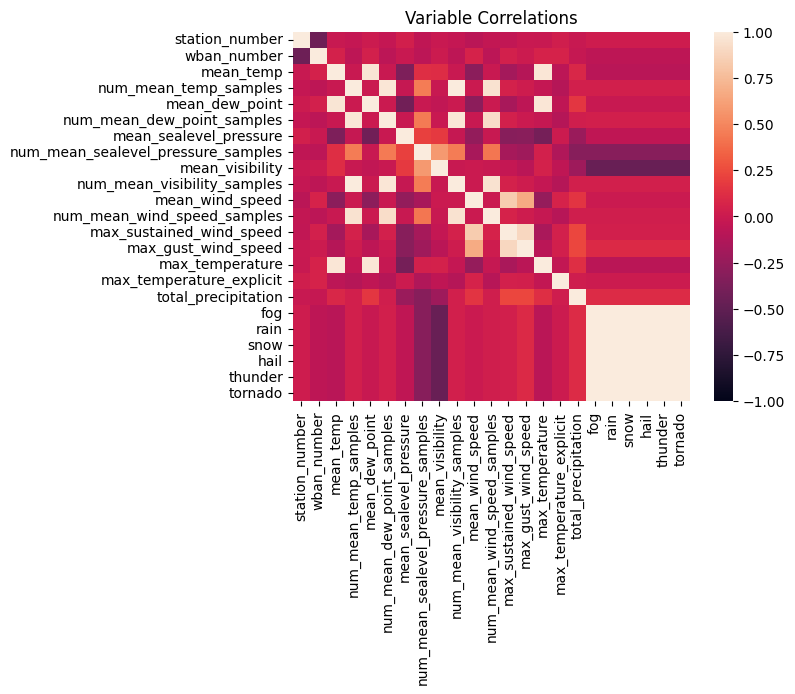

In [704]:
# inspect if any variables are highly correlated
weather_data_no_string = weather_data_subset.drop(columns=['date'])
sns.heatmap(weather_data_no_string.corr(), vmin=-1, vmax=1)
plt.title('Variable Correlations')

The plot shows that we have some highly correlated features that do not add information, make the training more expensive to run and might 
contribute to overfitting. Therefore, it is good practice to remove some of them.
We will remove 'num_mean_temp_samples', 'num_mean_dew_point_samples' and 'num_mean_visibility_samples' because they are correlated to various variables and unlikely to add important information. Furthermore, we will remove the other categorical variables (fog, rain, hail, thunder, tornado) because they are perfectly correlated (correlation = 1) to the target variable snow. 'max_temperature' is correlated to 'mean_temp' and 'mean_dew_point', so we keep those two and remove 'max_temperature'. Additionally, we can remove 'wban_number', 'max_temperature_explicit' and 'num_mean_sealevel_pressure_samples' since it does not contain any meaningful information.

In [705]:
variables_to_drop = ['wban_number','num_mean_temp_samples','num_mean_dew_point_samples','num_mean_visibility_samples','fog','rain','hail','thunder',\
                     'tornado','max_temperature','max_temperature_explicit','num_mean_sealevel_pressure_samples']
weather_data_subset.drop(variables_to_drop, axis=1, inplace=True)

/var/folders/kh/l5x0kpsx5cz08611zgnhwrxw0000gn/T/ipykernel_26160/3523848488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_subset.drop(variables_to_drop, axis=1, inplace=True)


In [706]:
# find missing values
weather_data_subset.isna().sum()

date                              0
station_number                    0
mean_temp                         0
mean_dew_point                    2
mean_sealevel_pressure         1838
mean_visibility                   3
mean_wind_speed                   5
num_mean_wind_speed_samples       5
max_sustained_wind_speed         10
max_gust_wind_speed            6661
total_precipitation             191
snow                              0
dtype: int64

Some columns have only very few missing values. We will fill those with the mean of the column

In [707]:
# 'num_mean_wind_speed_samples' contains integers, so we first convert the mean to an integer before filling missing values
mean_value = int(weather_data_subset['num_mean_wind_speed_samples'].mean())
weather_data_subset['num_mean_wind_speed_samples'].fillna(mean_value, inplace=True)

# fill missing values in the rest of the columns with only few NaN values
columns_to_fill = ['mean_dew_point', 'mean_visibility','mean_wind_speed','max_sustained_wind_speed']

for name in columns_to_fill:
    weather_data_subset[name].fillna(weather_data_subset[name].mean(), inplace=True)

/var/folders/kh/l5x0kpsx5cz08611zgnhwrxw0000gn/T/ipykernel_26160/2610107115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_subset['num_mean_wind_speed_samples'].fillna(mean_value, inplace=True)
/var/folders/kh/l5x0kpsx5cz08611zgnhwrxw0000gn/T/ipykernel_26160/2610107115.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_subset[name].fillna(weather_data_subset[name].mean(), inplace=True)


In [708]:
# find missing values
weather_data_subset.isna().sum()

date                              0
station_number                    0
mean_temp                         0
mean_dew_point                    0
mean_sealevel_pressure         1838
mean_visibility                   0
mean_wind_speed                   0
num_mean_wind_speed_samples       0
max_sustained_wind_speed          0
max_gust_wind_speed            6661
total_precipitation             191
snow                              0
dtype: int64

Now there are still some columns with a large number of missing values in 'mean_sealevel_pressure',
'max_gust_wind_speed' and 'total_precipitation'. Since this is a time series, we can interpolate them.

In [709]:
# sort the dataset by date in case it was not sorted yet
weather_data_subset = weather_data_subset.sort_values(by='date', ascending=True)

In [710]:
# interpolate missing values in columns with many outliers

# convert date column to datetime type
weather_data_subset['date'] = pd.to_datetime(weather_data_subset['date'])

# set date as index
weather_data_subset.set_index('date', inplace=True)

# interpolate missing values using bfill method
columns_to_interpolate = ['mean_sealevel_pressure', 'max_gust_wind_speed','total_precipitation']

for col_name in columns_to_interpolate:
    weather_data_subset[col_name] = weather_data_subset[col_name].interpolate(method='bfill')

# check if it worked
weather_data_subset.isna().sum()

station_number                 0
mean_temp                      0
mean_dew_point                 0
mean_sealevel_pressure         0
mean_visibility                0
mean_wind_speed                0
num_mean_wind_speed_samples    0
max_sustained_wind_speed       0
max_gust_wind_speed            0
total_precipitation            0
snow                           0
dtype: int64

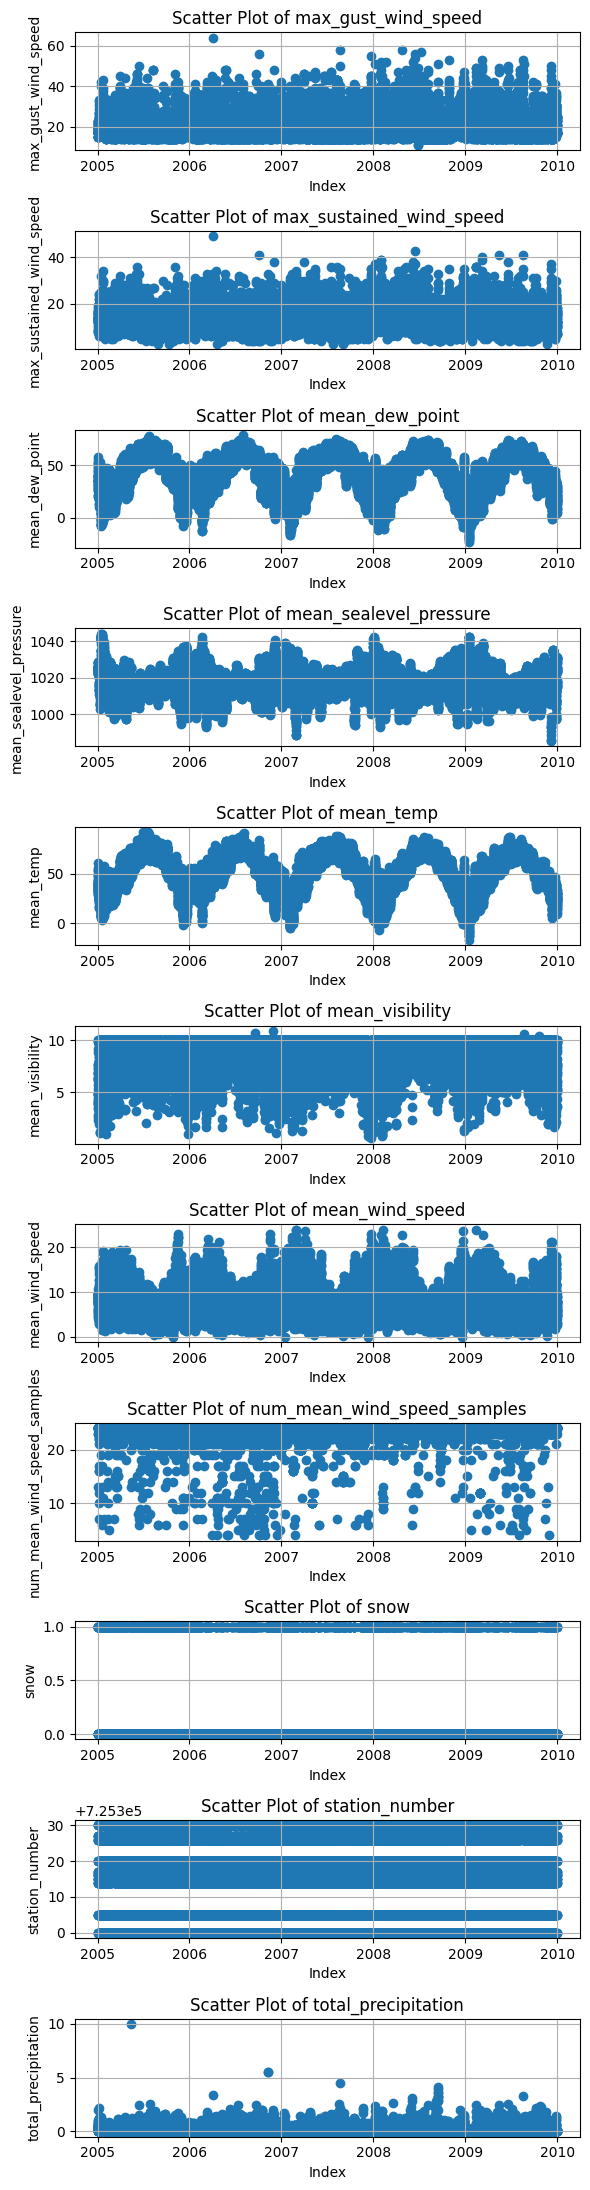

In [719]:
# check for outliers
columns_to_plot = weather_data_subset.columns.difference(['date'])

fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(6, len(columns_to_plot) *2))

for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    ax.scatter(weather_data_subset.index, weather_data_subset[col])
    ax.set_title(f'Scatter Plot of {col}')
    ax.set_xlabel('Index')
    ax.set_ylabel(col)
    ax.grid(True)

plt.tight_layout()
plt.show()

Overall the data looks good. One value in total_precipitation (10) could be considered an outlier, but we will keep it for the time being.

#### Feature Engineering
The variable station_number does not contain meaningful numerical information. The station itself however could indicate whether snow is 
more likely or less likely depending on where it is located. Therefore we will 1-hot encode station_number

In [720]:
weather_data_encoded = pd.get_dummies(weather_data_subset, columns=['station_number'], prefix='station')

,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,total_precipitation,snow,station_725300,station_725305,station_725314,station_725315,station_725316,station_725317,station_725320,station_725326,station_725327,station_725330
date,,,,,,,,,,,,,,,,,,,,
2005-01-01,40.299999,35.799999,1025.599976,7.0,9.0,24,13.0,18.1,0.01,True,False,False,False,False,True,False,False,False,False,False
2005-01-01,38.400002,32.599998,1027.800049,9.2,7.9,24,15.9,18.1,0.08,True,False,False,False,False,False,False,False,False,False,True
2005-01-01,35.299999,26.700001,1026.099976,7.6,9.3,24,14.0,18.1,0.38,True,False,False,False,False,False,False,True,False,False,False
2005-01-01,39.000000,34.299999,1026.000000,6.5,10.6,24,15.9,22.0,0.03,True,False,False,False,True,False,False,False,False,False,False
2005-01-01,48.599998,46.000000,1025.400024,4.8,7.0,24,13.0,22.0,0.03,True,False,False,False,False,False,True,False,False,False,False


Additionally, the year, month and day can also provide information whether snowfall is likely or not. We will convert the date string to numerical 
features so that the classifier can also use some time information, although it is circular.

In [721]:
# encode temporal variables as numerical data
weather_data_encoded['year'] = weather_data_encoded['date'].dt.year
weather_data_encoded['month'] = weather_data_encoded['date'].dt.month
weather_data_encoded['day'] = weather_data_encoded['date'].dt.day
weather_data_encoded.head()

KeyError: 'date'

In [714]:
def year2num(date_str):
    """Extracts the year in integer format from a date string in the format 'YYYY-MM-DD'."""
    year = int(date_str[0:4])
    return year

def month2num(date_str):
    """Extracts the month in integer format from a date string in the format 'YYYY-MM-DD'."""
    month = int(date_str[5:7])
    return month

def day2num(date_str):
    """Extracts the day in integer format from a date string in the format 'YYYY-MM-DD'."""
    day = int(date_str[8:10]) 
    return day


In [715]:
 # convert date string to numerical features for classification 
df_with_info['year'] = df_with_info['date'].apply(year2num)
df_with_info['month'] = df_with_info['date'].apply(month2num)
df_with_info['day'] = df_with_info['date'].apply(day2num)

NameError: name 'df_with_info' is not defined

In [ ]:
# plot descriptive statistics
df_with_info.describe()

,station_number,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_temperature,total_precipitation,snow_depth,year,month,day
count,1434.0,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000
mean,725300.0,50.782078,39.312762,1016.499442,8.980056,8.247908,41.114296,0.121450,1.267912,2007.524407,6.613668,15.785216
std,0.0,19.662879,18.513724,7.055709,1.634146,3.213301,18.890927,0.319141,1.736634,1.111899,3.401487,8.821952
min,725300.0,-9.700000,-18.900000,985.900024,1.100000,2.000000,-18.000000,0.000000,0.000000,2006.000000,1.000000,1.000000
25%,725300.0,35.124999,25.600000,1012.124985,8.600000,5.825000,27.100000,0.000000,0.000000,2007.000000,4.000000,8.000000
50%,725300.0,52.099998,40.799999,1016.299988,9.800000,7.800000,42.099998,0.000000,0.000000,2008.000000,7.000000,16.000000
75%,725300.0,68.199997,54.975000,1020.799988,10.000000,10.100000,57.150001,0.080000,2.000000,2009.000000,10.000000,23.000000
max,725300.0,89.000000,73.699997,1039.900024,10.000000,20.200001,80.099998,3.910000,9.800000,2009.000000,12.000000,31.000000


### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for should constitute your test set.

In [ ]:
import datetime as dt

today = str(dt.datetime.today()- dt.timedelta(days=15*365)).split(' ')[0]
today

'2009-06-29'

In [ ]:
df_with_info = pd.read_csv('coding_challenge.csv')

get the number of datapoints where snow=true vs snow=false. This will give us an overview over how balanced or unbalanced
our dataset is and which evaluation metric to use

In [ ]:
snow = df_with_info['snow'].sum()
no_snow = (df_with_info['snow'] == False).sum()
print('snow: ', snow)
print('no snow: ', no_snow)
print(f'{(snow/no_snow)*100:.0f}% positive classes')

snow:  1413
no snow:  13919
10% positive classes


There is much more often no snow than snow. Therefore, we should later on look at precision, recall and f1-score and find an
appropriate threshold to detect snow. This will most likely have to be lower than 0.5

In [ ]:
# test set: today
test_set = df_with_info[df_with_info['date'] == today]

# since our data is sequential, we will from here only use the data before today
remaining_data = df_with_info[df_with_info['date'] < today]

# use 80% of the remainin data for the test set
train_size = int(len(remaining_data) * 0.8)

# split the remaining data into training and evaluation sets
train_set = remaining_data.iloc[:train_size]
evaluation_set = remaining_data.iloc[train_size:]

# Display the resulting sets
print("Train Set")
print(train_set)

print("\nEvaluation Set")
print(evaluation_set)

print("\nTest Set")
print(test_set)

Train Set
             date  station_number  mean_temp  mean_dew_point  \
0      2006-01-24          725300  33.200001       26.799999   
1      2006-01-25          725300  33.299999       21.400000   
2      2006-01-26          725300  30.299999       19.700001   
3      2006-01-27          725300  39.900002       25.299999   
4      2006-01-28          725300  43.200001       33.799999   
...           ...             ...        ...             ...   
12256  2006-02-01          725320  41.000000       32.299999   
12257  2006-02-02          725320  36.599998       31.400000   
12258  2006-02-03          725320  38.700001       34.700001   
12259  2006-02-04          725320  26.900000       19.600000   
12260  2006-02-05          725320  22.900000       14.100000   

       mean_sealevel_pressure  mean_visibility  mean_wind_speed  \
0                 1008.500000              7.0             15.2   
1                 1021.099976             10.0             14.0   
2                 10

In [ ]:
# (1) separate features (X) and target (y) and remove string column (date)
# (2) remove string column (date)
# (3) remove snow_depth variable because it could be data leakage (low snow_depth = lower likelihood of snow)

X_train = train_set.drop(['snow','date','snow_depth'], axis=1)
y_train = train_set['snow']

X_eval = evaluation_set.drop(['snow','date','snow_depth'], axis=1)
y_eval = evaluation_set['snow']

X_test = test_set.drop(['snow','date','snow_depth'], axis=1)
y_test = test_set['snow']

In [ ]:
# check if dimensions are correct and match
print('training data: ', X_train.shape)
print('training labels: ', y_train.shape)

print('evaluation data: ', X_eval.shape)
print('evaluation labels: ', y_eval.shape)

print('test data: ', X_test.shape)
print('test labels: ', y_test.shape)

training data:  (9947, 11)
training labels:  (9947,)
evaluation data:  (2487, 11)
evaluation labels:  (2487,)
test data:  (9, 11)
test labels:  (9,)


## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

In [ ]:
import datetime as dt

today = str(dt.datetime.today()- dt.timedelta(days=15*365)).split(' ')[0]
today

'2009-06-29'

You are allowed to use any library you are comfortable with such as sklearn, tensorflow, keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 

In [ ]:
# this is a classification task. start by using simple logistic regression as baseline model
logreg = LogisticRegression(max_iter=1000, class_weight='balanced').fit(X_train, y_train)

# get predictions
y_eval_pred = logreg.predict(X_eval)

# get probabilities
y_eval_prob = logreg.predict_proba(X_eval)[:, 1]

# get precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_eval, y_eval_prob)

# Calculate F1-score for each threshold
f1_scores = []
for threshold in thresholds:
    y_eval_pred_threshold = (y_eval_prob >= threshold).astype(int)
    f1_scores.append(f1_score(y_eval, y_eval_pred_threshold))

# Find the threshold that gives the maximum F1-score
best_threshold_index = f1_scores.index(max(f1_scores))
best_threshold = thresholds[best_threshold_index]
best_f1 = f1_scores[best_threshold_index]

print(f'The best threshold is {best_threshold:.2f}')
print(f'The best F1-score is {best_f1:.2f}')

# calculate area under the curve
AUC = auc(recall, precision)

print(f'The area under the curve is {AUC:.2f}')

The best threshold is 0.68
The best F1-score is 0.50
The area under the curve is 0.53


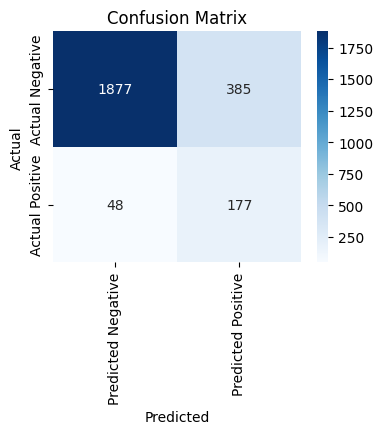

In [ ]:
conf_matrix = confusion_matrix(y_eval, y_eval_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

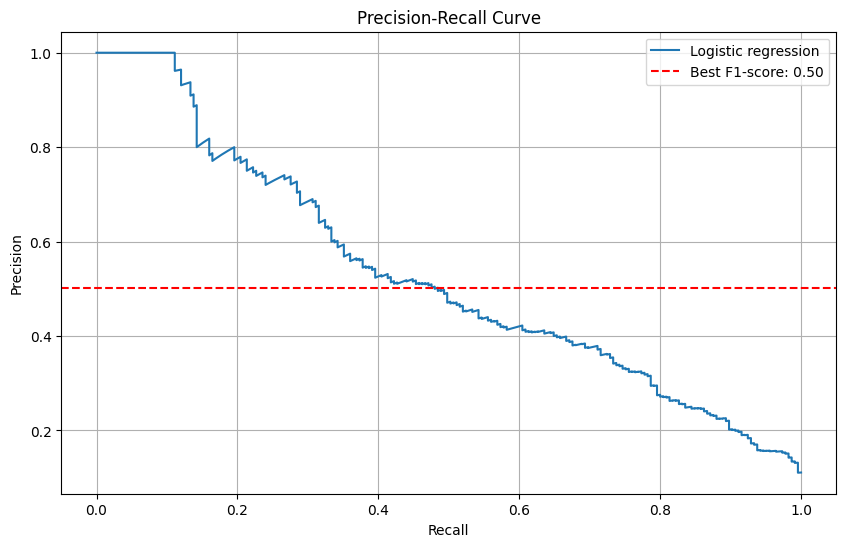

In [ ]:
# Plot the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Logistic regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.axhline(y=best_f1, color='r', linestyle='--', label=f'Best F1-score: {best_f1:.2f}')
plt.legend(loc='best')
plt.grid(True)
plt.show()

The F1-score on the test set is 0.00
The area under the curve on the test set is nan


/Users/monika/opt/anaconda3/envs/dsr-b34/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/monika/opt/anaconda3/envs/dsr-b34/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in divide
  recall = tps / tps[-1]


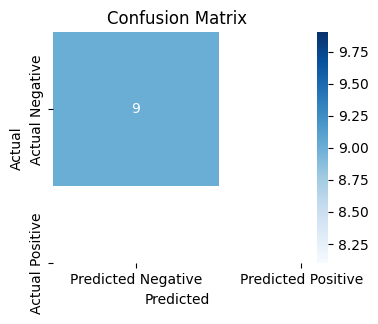

In [ ]:
# evaluate final model on test set
y_test_prob = logreg.predict_proba(X_test)[:, 1]

# Apply the best threshold
y_test_pred = (y_test_prob >= best_threshold).astype(int)

# Step 4: Evaluate the model performance on the test set
# Calculate F1-score for the test set
test_f1 = f1_score(y_test, y_test_pred)
print(f'The F1-score on the test set is {test_f1:.2f}')

# Calculate precision, recall, and AUC for the test set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_prob)
test_auc = auc(recall_test, precision_test)
print(f'The area under the curve on the test set is {test_auc:.2f}')

# confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# plot the confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Since there are no positive classes on the day of the test data, the f1-score is undefined. But the raw data shows that all
predictions were correct.

In [ ]:
# grid search over different models and parameters
# compare it to baseline model

In [ ]:
# plot actual data and predictions
def plot_actual_vs_predictions(time, actual, predicted, title='Actual vs Predicted'):
    plt.figure(figsize=(15, 6))
    plt.plot(time, actual, label='Actual', alpha=0.7, marker='o')
    plt.plot(time, predicted, label='Predicted', alpha=0.7, marker='x')
    plt.xlabel('Time')
    plt.ylabel('Class')
    plt.title(title)
    plt.legend()
    plt.show()